In [20]:
from keras.applications import imagenet_utils
from keras.applications import resnet
import tensorflow as tf
# isort: off
from tensorflow.python.util.tf_export import keras_export
import numpy as np
import warnings
warnings.filterwarnings("ignore")


In [21]:
@keras_export(
    "keras.applications.resnet_v2.ResNet50V2", "keras.applications.ResNet50V2"
)
def ResNet50V2(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
):
    """Instantiates the ResNet50V2 architecture."""

    def stack_fn(x):
        x = resnet.stack2(x, 64, 3, name="conv2")
        x = resnet.stack2(x, 128, 4, name="conv3")
        x = resnet.stack2(x, 256, 6, name="conv4")
        return resnet.stack2(x, 512, 3, stride1=1, name="conv5")

    return resnet.ResNet(
        stack_fn,
        True,
        True,
        "resnet50v2",
        include_top,
        weights,
        input_tensor,
        input_shape,
        pooling,
        classes,
        classifier_activation=classifier_activation,
    )


In [22]:
@keras_export("keras.applications.resnet_v2.preprocess_input")
def preprocess_input(x, data_format=None):
    return imagenet_utils.preprocess_input(
        x, data_format=data_format, mode="tf"
    )


@keras_export("keras.applications.resnet_v2.decode_predictions")
def decode_predictions(preds, top=5):
    return imagenet_utils.decode_predictions(preds, top=top)

In [23]:
model = ResNet50V2()

In [38]:
img_path='img.jpg'

In [25]:
import matplotlib.pyplot as plt

In [26]:
%matplotlib inline

In [49]:
from skimage.io import imread

img = imread(img_path)

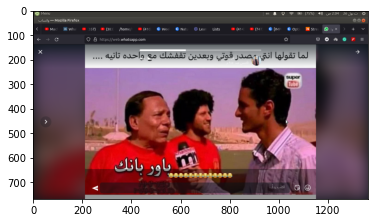

In [50]:
plt.imshow(img);

In [51]:
image = tf.keras.preprocessing.image.load_img(img_path,target_size=(224, 224, 3))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
input_arr = preprocess_input(input_arr)
predictions = model.predict(input_arr)


1/1 [==============================] - 0s 232ms/step


In [53]:
decode_predictions(predictions, top=5)[0]

[('n06359193', 'web_site', 0.9864806),
 ('n03782006', 'monitor', 0.006550435),
 ('n03584254', 'iPod', 0.0011891132),
 ('n03485407', 'hand-held_computer', 0.0009512152),
 ('n04152593', 'screen', 0.0008438169)]